<a href="https://colab.research.google.com/github/BossDevinator/IS_4482/blob/main/A8_Moore_Devan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ASSIGNMENT 8:
###Devan Moore
###10/30/2024


##TASK 1:
###Set up, Data Import, and Preparation

In [1]:
import numpy as np
import pandas as pd
import random

from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, recall_score, precision_score, f1_score, accuracy_score, make_scorer, precision_recall_fscore_support, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split, cross_validate

from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')
from google.colab import drive
import seaborn as sns

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.dummy import DummyClassifier

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/matthewpecsok/4482_fall_2024/main/data/CD_additional_modified.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4117 entries, 0 to 4116
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4117 non-null   int64  
 1   job             4117 non-null   object 
 2   marital         4117 non-null   object 
 3   education       4117 non-null   object 
 4   default         4117 non-null   object 
 5   housing         4117 non-null   object 
 6   loan            4117 non-null   object 
 7   contact         4117 non-null   object 
 8   month           4117 non-null   object 
 9   day_of_week     4117 non-null   object 
 10  duration        4117 non-null   int64  
 11  campaign        4117 non-null   int64  
 12  pdays           4117 non-null   int64  
 13  previous        4117 non-null   int64  
 14  poutcome        4117 non-null   object 
 15  emp_var_rate    4117 non-null   float64
 16  cons_price_idx  4117 non-null   float64
 17  cons_conf_idx   4117 non-null   f

In [4]:
df.describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
count,4117.000000,4117.000000,4117.000000,4117.000000,4117.000000,4117.000000,4117.000000,4117.000000,4117.000000,4117.000000
mean,40.115375,256.850376,2.537042,960.403449,0.190187,0.085742,93.580131,-40.500947,3.621904,5166.496502
std,10.314847,254.749615,2.568668,191.967524,0.541765,1.562799,0.579061,4.593445,1.733448,73.670942
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [5]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [6]:
Y = df.pop('y')
Y = pd.get_dummies(Y, drop_first=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4117 entries, 0 to 4116
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4117 non-null   int64  
 1   job             4117 non-null   object 
 2   marital         4117 non-null   object 
 3   education       4117 non-null   object 
 4   default         4117 non-null   object 
 5   housing         4117 non-null   object 
 6   loan            4117 non-null   object 
 7   contact         4117 non-null   object 
 8   month           4117 non-null   object 
 9   day_of_week     4117 non-null   object 
 10  duration        4117 non-null   int64  
 11  campaign        4117 non-null   int64  
 12  pdays           4117 non-null   int64  
 13  previous        4117 non-null   int64  
 14  poutcome        4117 non-null   object 
 15  emp_var_rate    4117 non-null   float64
 16  cons_price_idx  4117 non-null   float64
 17  cons_conf_idx   4117 non-null   f

In [8]:
df.describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
count,4117.000000,4117.000000,4117.000000,4117.000000,4117.000000,4117.000000,4117.000000,4117.000000,4117.000000,4117.000000
mean,40.115375,256.850376,2.537042,960.403449,0.190187,0.085742,93.580131,-40.500947,3.621904,5166.496502
std,10.314847,254.749615,2.568668,191.967524,0.541765,1.562799,0.579061,4.593445,1.733448,73.670942
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [9]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1
1,39,services,single,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8


In [10]:
X = pd.get_dummies(df)

In [11]:
X.head()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,30,487,2,999,0,-1.8,92.893,-46.2,1.313,5099.1,...,False,False,True,False,False,False,False,False,True,False
1,39,346,4,999,0,1.1,93.994,-36.4,4.855,5191.0,...,False,False,True,False,False,False,False,False,True,False
2,25,227,1,999,0,1.4,94.465,-41.8,4.962,5228.1,...,False,False,False,False,False,False,True,False,True,False
3,38,17,3,999,0,1.4,94.465,-41.8,4.959,5228.1,...,False,False,True,False,False,False,False,False,True,False
4,47,58,1,999,0,-0.1,93.200,-42.0,4.191,5195.8,...,False,False,False,True,False,False,False,False,True,False


##TASK 2:
###Standardize the Data

In [12]:
X_random_col = X.copy()
X_random_col['a_random'] = random.sample(range(9999999,99999999), X_random_col.shape[0])
X_random_col[['age','a_random']].head()

,age,a_random
0,30,11668841
1,39,33247975
2,25,80787411
3,38,16414117
4,47,32528960


In [13]:
X_random_columns_scaled = X.copy()
X_random_columns_scaled['a_random_big'] = random.sample(range(9999999,99999999), X_random_col.shape[0])
X_random_columns_scaled['b_random_big'] = random.sample(range(9999999,99999999), X_random_col.shape[0])
X_random_columns_scaled['c_random_big'] = random.sample(range(9999999,99999999), X_random_col.shape[0])
X_random_columns_scaled['d_random_big'] = random.sample(range(9999999,99999999), X_random_col.shape[0])
X_random_columns_scaled['e_random_big'] = random.sample(range(9999999,99999999), X_random_col.shape[0])

print('prescaled',"\n")
display(X_random_columns_scaled[['age', 'a_random_big', 'b_random_big', 'c_random_big', 'd_random_big', 'e_random_big']].head())

column_names = X_random_columns_scaled.columns

X_random_columns_scaled = StandardScaler().fit_transform(X_random_columns_scaled)
X_random_columns_scaled = pd.DataFrame(X_random_columns_scaled, columns=column_names)
print("\n", 'scaled')
X_random_columns_scaled.head()

prescaled 



,age,a_random_big,b_random_big,c_random_big,d_random_big,e_random_big
0,30,98795312,70617533,93165825,40989294,67080311
1,39,51226246,68092806,49927980,29936917,36980809
2,25,33644488,58424256,59134933,15346612,81729664
3,38,75045993,30200859,70592925,69653423,71688527
4,47,66464018,11959252,83167880,94797465,66217543



 scaled


,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,a_random_big,b_random_big,c_random_big,d_random_big,e_random_big
0,-0.980781,0.903544,-0.209099,0.201082,-0.351094,-1.206791,-1.186776,-1.240843,-1.332133,-0.914943,...,-0.506292,-0.488816,-0.351618,0.411021,-0.189006,1.670089,0.591682,1.468010,-0.536605,0.477063
1,-0.108146,0.349992,0.569609,0.201082,-0.351094,0.649080,0.714811,0.892891,0.711441,0.332648,...,-0.506292,-0.488816,-0.351618,0.411021,-0.189006,-0.154364,0.495231,-0.194615,-0.955689,-0.688723
2,-1.465578,-0.117190,-0.598453,0.201082,-0.351094,0.841066,1.528296,-0.282840,0.773175,0.836300,...,-0.506292,2.045761,-0.351618,0.411021,-0.189006,-0.828691,0.125867,0.159420,-1.508923,1.044448
3,-0.205106,-0.941629,0.180255,0.201082,-0.351094,0.841066,1.528296,-0.282840,0.771444,0.836300,...,-0.506292,-0.488816,-0.351618,0.411021,-0.189006,0.759213,-0.952339,0.600014,0.550280,0.655544
4,0.667529,-0.780667,-0.598453,0.201082,-0.351094,-0.118867,-0.656542,-0.326386,0.328343,0.397810,...,-0.506292,-0.488816,-0.351618,0.411021,-0.189006,0.430062,-1.649216,1.083559,1.503691,0.443647


##TASK 3:
###Search Neighbors

In [14]:
parameters = {'n_neighbors': [i for i in range (10)],
              'p': [i for i in range(1,2)]
              }

In [15]:
print("uniform f1 cv score (unscaled):", round(cross_val_score(DummyClassifier(strategy="uniform"), X_random_col, Y, scoring='f1').mean(),2))
print("stratified f1 cv score (unscaled):", round(cross_val_score(DummyClassifier(strategy="stratified"), X_random_col, Y, scoring='f1').mean(),2))

uniform f1 cv score (unscaled): 0.18
stratified f1 cv score (unscaled): 0.12


In [16]:
scaler = StandardScaler()
scaler.fit(X)

X_scaled = scaler.transform(X)
X_scaled[:2]

array([[-0.98078083,  0.90354437, -0.20909931,  0.20108213, -0.35109354,
        -1.20679066, -1.18677552, -1.24084327, -1.33213336, -0.91494268,
        -0.57089923,  1.91239113, -0.19310357, -0.16568633, -0.29226788,
        -0.20433064, -0.20042905, -0.32485641, -0.14255589, -0.44910237,
        -0.16568633, -0.09779321, -0.34811976,  0.80096632, -0.62369973,
        -0.05175912, -0.34106189, -0.24212992,  2.48444639, -0.53644178,
        -0.3864685 , -0.66561431, -0.20561732,  0.49224523, -0.49224523,
        -0.89760891, -0.16177604,  0.94491987,  0.47964233, -0.16177604,
        -0.43890995,  0.74403287, -0.74403287, -0.23473378, -0.42704386,
        -0.07329669, -0.45689087, -0.38439015, -0.10861174,  1.40984513,
        -0.34811976, -0.13055824, -0.12566134,  2.08822343, -0.51196595,
        -0.51385472, -0.50629242, -0.48881563, -0.35161822,  0.41102081,
        -0.18900601],
       [-0.10814613,  0.34999249,  0.56960885,  0.20108213, -0.35109354,
         0.64907977,  0.71481

In [17]:
clf = GridSearchCV(KNeighborsClassifier(), parameters, scoring='f1', cv=3).fit(X_scaled, Y)
result_df = pd.DataFrame(clf.cv_results_)
result_df[result_df['rank_test_score']==1]['mean_test_score']

,mean_test_score
1,0.313701


In [18]:
GridSearchResults = result_df[['param_n_neighbors','param_p','mean_test_score']].sort_values(by='mean_test_score', ascending=False).head(10)

##TASK 4:
###Show GridSearchCV Results

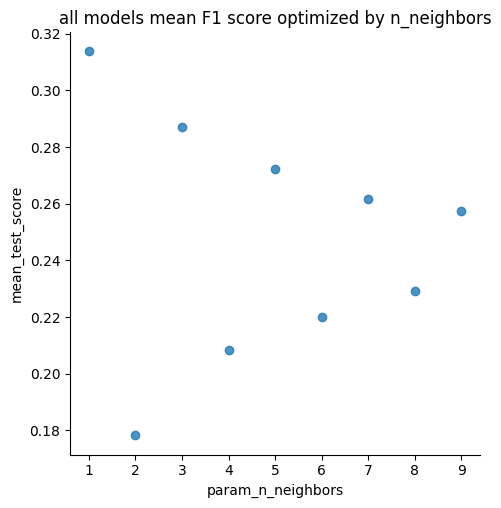

In [19]:
sns.lmplot(x='param_n_neighbors', y='mean_test_score', data=result_df, fit_reg=False)
plt.title("all models mean F1 score optimized by n_neighbors")
plt.show()

In [20]:
print("Results sorted by mean_test_score")
GridSearchResults

Results sorted by mean_test_score


,param_n_neighbors,param_p,mean_test_score
1,1,1,0.313701
3,3,1,0.286983
5,5,1,0.272250
7,7,1,0.261734
9,9,1,0.257471
8,8,1,0.228991
6,6,1,0.219898
4,4,1,0.208340
2,2,1,0.178176
0,0,1,NaN


As seen above, the models to have the highest f1-score where Manhattan models, ranging between 0.314 and 0.178. The top 5 nearest neighbor values that acheived the best results were 1, 3, 5, 7, and 9.

##MISC

In [23]:
!cp "/content/drive/MyDrive/Colab Notebooks/A8_Moore_Devan.ipynb" ./
!jupyter nbconvert --to html "A8_Moore_Devan"

[NbConvertApp] Converting notebook A8_Moore_Devan.ipynb to html
[NbConvertApp] Writing 741982 bytes to A8_Moore_Devan.html
